In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers, regularizers

In [2]:
train=pd.read_csv('SQLIV3_cleaned2.csv')
test=pd.read_csv('sqliv2_utf8.csv')


In [3]:
train.Label.value_counts()


Label
0    19268
1    11346
Name: count, dtype: int64

In [4]:

learning_rate=0.01

no_epochs=27

In [5]:
model = Sequential()


In [6]:

model.add(Dense(1, input_dim=3000, activation='sigmoid'))  # une seule couche Couche de sortie

In [7]:
sgd=optimizers.SGD(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['accuracy'])

In [8]:
train.head()

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1


In [9]:
train_x = train['Sentence'].values
train_y = train['Label'].values

##test_x = test['Sentence'].values
##test_y = test['Label'].values

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=3000)
train_x = vectorizer.fit_transform(train_x).toarray()



In [11]:
history = model.fit(train_x, train_y, epochs=no_epochs, batch_size=32, verbose=2, validation_split=0.2)


Epoch 1/27
766/766 - 3s - loss: 0.6806 - accuracy: 0.5959 - val_loss: 0.6189 - val_accuracy: 1.0000 - 3s/epoch - 4ms/step
Epoch 2/27
766/766 - 2s - loss: 0.6582 - accuracy: 0.6461 - val_loss: 0.6033 - val_accuracy: 1.0000 - 2s/epoch - 2ms/step
Epoch 3/27
766/766 - 2s - loss: 0.6376 - accuracy: 0.7615 - val_loss: 0.5871 - val_accuracy: 0.9997 - 2s/epoch - 2ms/step
Epoch 4/27
766/766 - 2s - loss: 0.6185 - accuracy: 0.8007 - val_loss: 0.5754 - val_accuracy: 0.9993 - 2s/epoch - 2ms/step
Epoch 5/27
766/766 - 2s - loss: 0.6007 - accuracy: 0.8380 - val_loss: 0.5614 - val_accuracy: 0.9993 - 2s/epoch - 2ms/step
Epoch 6/27
766/766 - 2s - loss: 0.5841 - accuracy: 0.8609 - val_loss: 0.5464 - val_accuracy: 0.9993 - 2s/epoch - 2ms/step
Epoch 7/27
766/766 - 2s - loss: 0.5686 - accuracy: 0.8740 - val_loss: 0.5329 - val_accuracy: 0.9993 - 2s/epoch - 2ms/step
Epoch 8/27
766/766 - 2s - loss: 0.5541 - accuracy: 0.8800 - val_loss: 0.5244 - val_accuracy: 0.9990 - 2s/epoch - 2ms/step
Epoch 9/27
766/766 - 2s 

In [12]:
# Affichage de la loss et accuracy après l'entraînement
print("Final Training Loss:", history.history['loss'][-1])
print("Final Training Accuracy:", history.history['accuracy'][-1])



Final Training Loss: 0.392019122838974
Final Training Accuracy: 0.9212363958358765


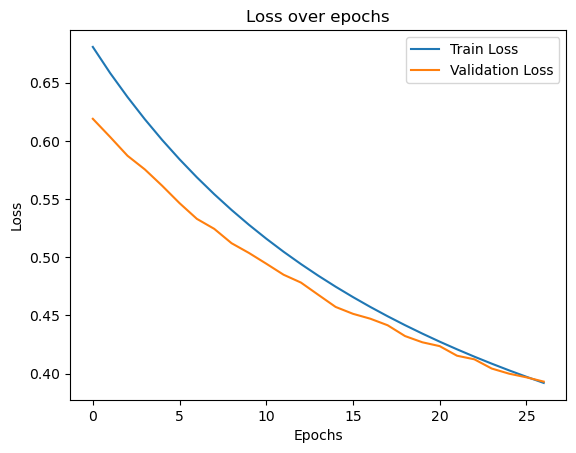

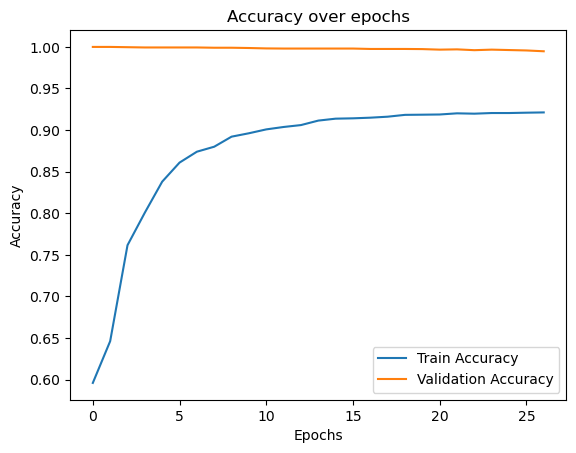

In [13]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
test_x = test['Sentence'].values
test_y = test['Label'].values
print(test.isnull().sum())


Sentence    3
Label       0
dtype: int64


In [15]:
test = test.dropna(subset=['Sentence'])



In [16]:
# Filtrer les lignes où Label == 1
filtered = test[test['Label'] == 1]
filtered = filtered.drop_duplicates(subset='Sentence', keep='first')


# Récupérer les 1000 exemples dans test_x et test_y
test_x = filtered['Sentence'].values
test_y = filtered['Label'].values


test_x = vectorizer.transform(test_x).toarray()

In [17]:
predictions = model.predict(test_x)


357/357 [==============================] - 1s 2ms/step


In [18]:
# Convertir les probabilités en classes binaires
predicted_classes = (predictions >= 0.5).astype(int)

# Afficher les 20 premières prédictions
print(predicted_classes.flatten())


[1 0 0 ... 1 1 0]


In [19]:
# Compter le nombre de prédictions égales à 1
nombre_de_sql_injections = (predicted_classes == 1).sum()

print(f"Nombre de requêtes détectées comme SQL injection : {nombre_de_sql_injections}")


Nombre de requêtes détectées comme SQL injection : 9539


In [20]:
test.Label.value_counts()


Label
0    22304
1    11453
Name: count, dtype: int64

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcul des métriques pour la première prédiction
predicted_classes = (predictions >= 0.5).astype(int)

# Afficher les 20 premières prédictions
print(predicted_classes.flatten())

# Compter le nombre de prédictions égales à 1
nombre_de_sql_injections = (predicted_classes == 1).sum()

print(f"Nombre de requêtes détectées comme SQL injection : {nombre_de_sql_injections}")
print(f"accuracy après tester avec le premier dataset : {accuracy_score(test_y, predicted_classes) * 100:.2f}%")
print(f"precision : {precision_score(test_y, predicted_classes, zero_division=0) * 100:.2f}%")
print(f"recall : {recall_score(test_y, predicted_classes, zero_division=0) * 100:.2f}%")
print(f"F1 Score : {f1_score(test_y, predicted_classes, zero_division=0) * 100:.2f}%")


[1 0 0 ... 1 1 0]
Nombre de requêtes détectées comme SQL injection : 9539
accuracy après tester avec le premier dataset : 83.50%
precision : 100.00%
recall : 83.50%
F1 Score : 91.01%


In [22]:
# Filtrer les lignes où Label == 1
filtered2 = test[test['Label'] == 0]

# Récupérer les 1000 exemples dans test_x et test_y
test_x2 = filtered2['Sentence'].values
test_y2 = filtered2['Label'].values


test_x2 = vectorizer.transform(test_x2).toarray()

In [23]:
predictions2 = model.predict(test_x2)


697/697 [==============================] - 1s 2ms/step


In [24]:
# Convertir les probabilités en classes binaires
predicted_classes2 = (predictions2 >= 0.5).astype(int)

# Afficher les 20 premières prédictions
print(predicted_classes2.flatten())


[0 0 0 ... 0 0 0]


In [25]:
# Compter le nombre de prédictions égales à 1
nombre_de_non_sql_injections = (predicted_classes2 == 0).sum()

print(f"Nombre de requêtes non détectées comme SQL injection : {nombre_de_non_sql_injections}")


Nombre de requêtes non détectées comme SQL injection : 22288


In [26]:
test.Label.value_counts()


Label
0    22304
1    11453
Name: count, dtype: int64

In [27]:
print(f"accuracy apres testé avec le deuxiéme datset avec les non sql injection est ={nombre_de_non_sql_injections/len(test_x2)} ")

accuracy apres testé avec le deuxiéme datset avec les non sql injection est =0.9992826398852224 


In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# --- 1. Préparation des données ---
# Filtrer les lignes où Label == 0 (NON-SPAM = NON-SQLi)
filtered2 = test[test['Label'] == 0]
filtered2 = filtered2.drop_duplicates(subset='Sentence', keep='first')


# Récupérer les exemples
test_x2 = filtered2['Sentence'].values
test_y2 = filtered2['Label'].values  # Ce sera 0 partout ici

# Vectoriser
test_x2_vectorized = vectorizer.transform(test_x2).toarray()

# --- 2. Prédiction ---
predictions2 = model.predict(test_x2_vectorized)

# Convertir en classes binaires (0 ou 1)
predicted_classes2 = (predictions2 >= 0.5).astype(int).flatten()  # Assurer un vecteur plat
test_y2 = test_y2.flatten()

# --- 3. Afficher quelques prédictions ---
print("Premières prédictions :", predicted_classes2[:20])

# --- 4. Calcul du nombre de non-SQLi détectées (c’est-à-dire prédits 0) ---
nombre_de_non_sql_injections = (predicted_classes2 == 0).sum()
print(f"Nombre de requêtes détectées comme NON SQL injection : {nombre_de_non_sql_injections} / {len(test_y2)}")

# --- 5. Calcul et affichage des métriques ---
print(f"Accuracy après test avec le dataset filtré : {accuracy_score(test_y2, predicted_classes2) * 100:.2f}%")
print(f"Precision : {precision_score(test_y2, predicted_classes2, zero_division=0, pos_label=0) * 100:.2f}%")
print(f"Recall :    {recall_score(test_y2, predicted_classes2, zero_division=0, pos_label=0) * 100:.2f}%")
print(f"F1 Score :  {f1_score(test_y2, predicted_classes2, zero_division=0, pos_label=0) * 100:.2f}%")


697/697 [==============================] - 1s 2ms/step
Premières prédictions : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Nombre de requêtes détectées comme NON SQL injection : 22287 / 22303
Accuracy après test avec le dataset filtré : 99.93%
Precision : 100.00%
Recall :    99.93%
F1 Score :  99.96%
